![](https://www.santander.co.uk/themes/custom/santander_web18/logo.svg)

[image-source](https://www.santander.co.uk/themes/custom/santander_web18/logo.svg)

## Table of Contents

- [Problem Definition and Objectives](#intro)
- [Exploratory Data Analysis](#EDA)
- [Machine Learning Modeling](#ML)
    - [Feature Engineering](#FE)
    - [Decision Tree](#DT)
    - [Logistic Regression](#LG)
    - [Random Forest](#RD)
    - [Navey Bayes](#NB)
    - [Tuned Model Training](#tuned)
- [Conclusion](#conclusion)

## Problem Definition and Objectives
<a id="intro"></a>

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Santander is continually challenging its machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, Kagglers are invited to help Santander identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of target column in the test set.

## Exploratory Data Analysis
<a id="EDA"></a>

![](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

[image-source](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import lightgbm as lgb
import os

In [3]:
#set working directory-
os.chdir("F:\Edvisor Project\Santender_Project")

#check current working directory-
os.getcwd()

'F:\\Edvisor Project\\Santender_Project'

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [8]:
train.shape

(200000, 202)

In [9]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


#### Missing Data Analysis

In [10]:
miss_train = pd.DataFrame(train.isnull().sum())
np.transpose(miss_train)            #for better visibility and no missing values throughout

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
miss_test = pd.DataFrame(test.isnull().sum())
np.transpose(miss_test)  

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Outlier Analysis

In [12]:
#checking outliers using Chauvenet's criterion
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function

In [13]:
numerical_features=train.columns[2:]

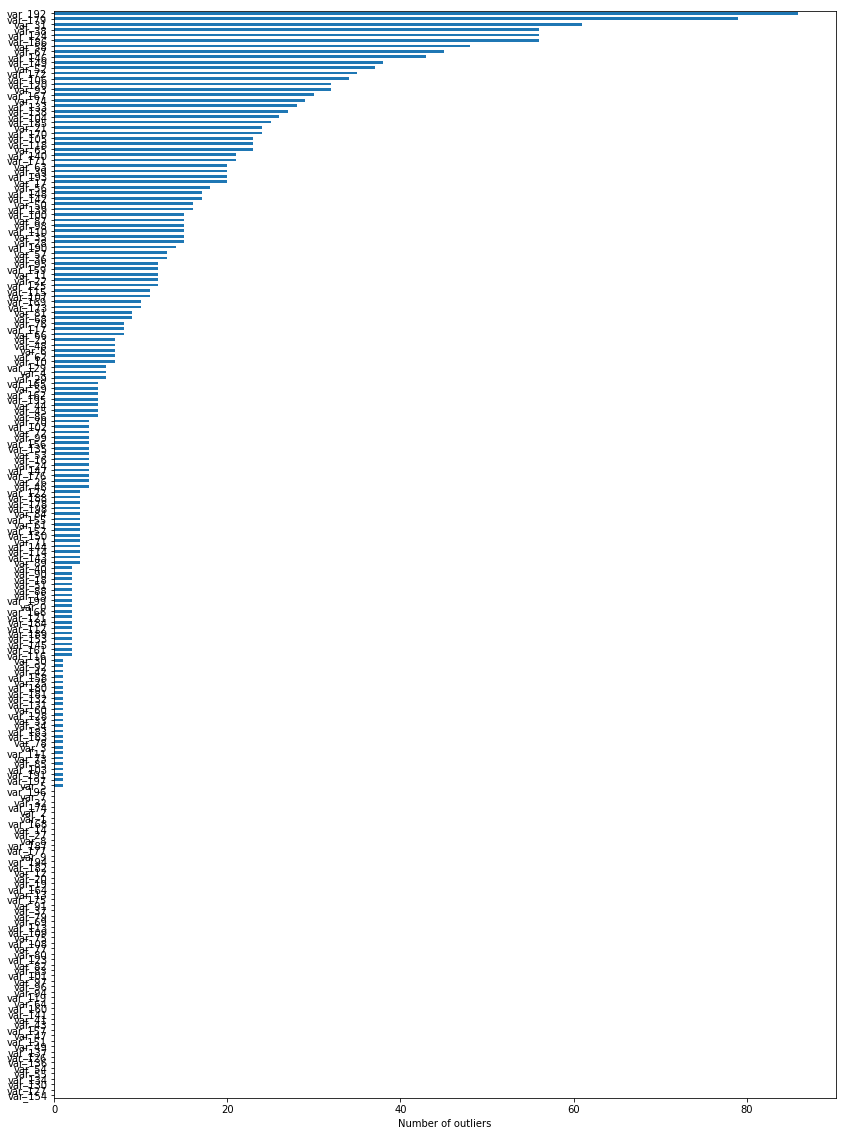

In [17]:
from scipy.special import erfc
train_outliers = dict()
for col in [col for col in numerical_features]:
    train_outliers[col] = train[chauvenet(train[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

train_outliers.sort_values().plot(figsize=(14, 20), kind='barh').set_xlabel('Number of outliers');

In [18]:
print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / train.shape[0]) * 100))

Total number of outliers in training set: 1740 (0.87%)


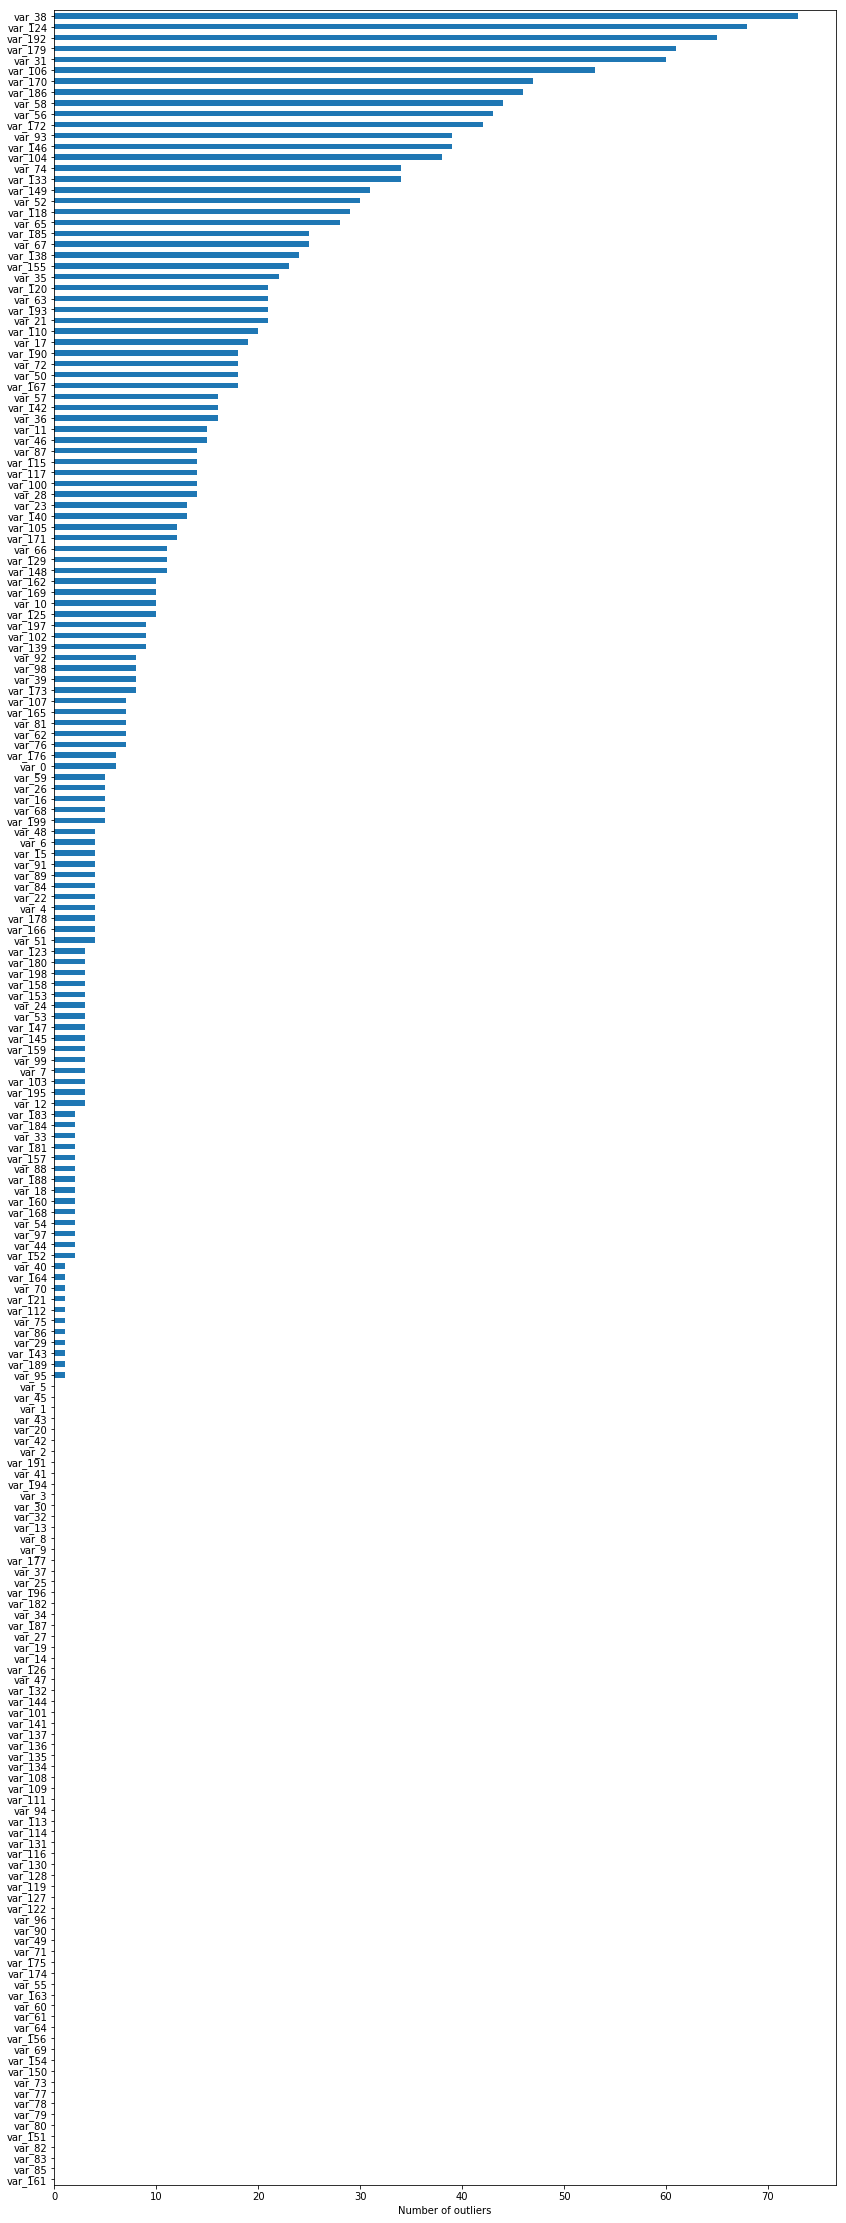

In [19]:
#outliers in each variable in test data 
test_outliers = dict()
for col in [col for col in numerical_features]:
    test_outliers[col] = test[chauvenet(test[col].values)].shape[0]
test_outliers = pd.Series(test_outliers)

test_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

In [20]:
print('Total number of outliers in testing set: {} ({:.2f}%)'.format(sum(test_outliers.values), (sum(test_outliers.values) / test.shape[0]) * 100))

Total number of outliers in testing set: 1748 (0.87%)


In [21]:
#remove these outliers in train and test data
for col in numerical_features:
    train=train.loc[(~chauvenet(train[col].values))]
for col in numerical_features:
    test=test.loc[(~chauvenet(test[col].values))]

In [22]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

##### Feature Distributions

<Figure size 432x288 with 0 Axes>

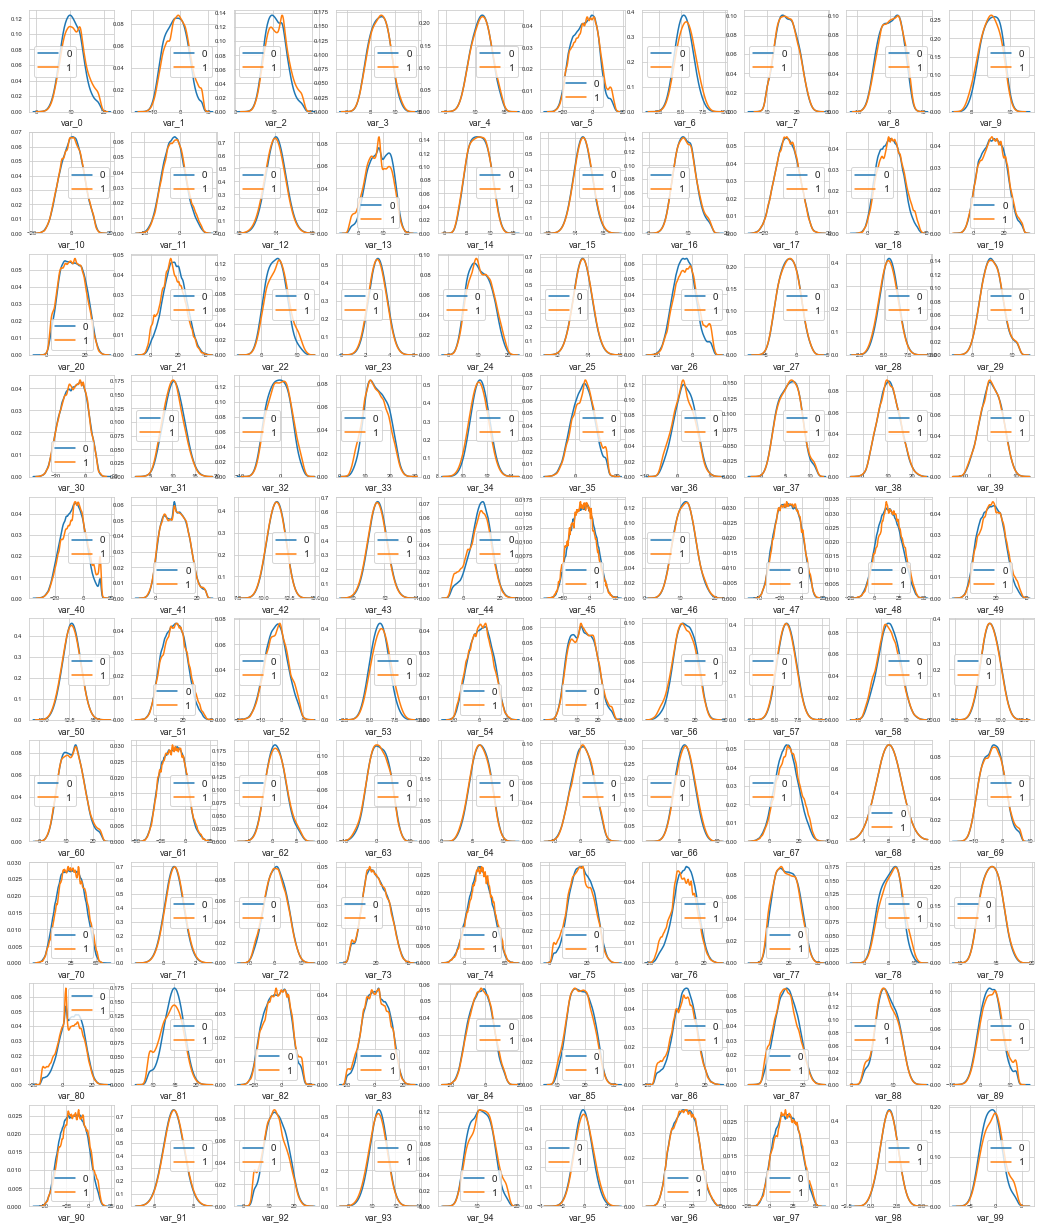

In [23]:
import seaborn as sns
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

Distribution of the mean values per row in the train and test set.

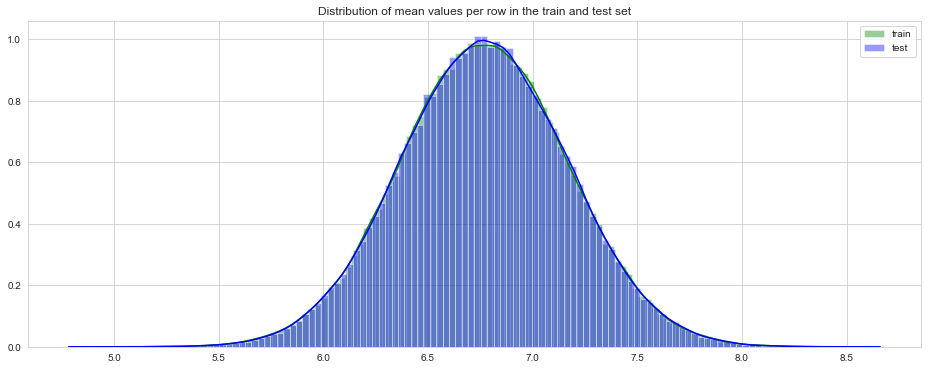

In [24]:
# distribution of the mean values per row in the train and test set.
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

distribution of the mean values per columns in the train and test set.

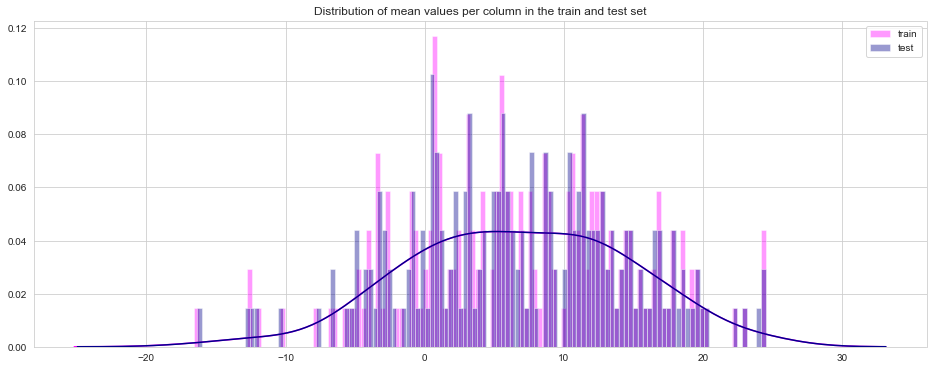

In [25]:
#distribution of the mean values per columns in the train and test set.
    
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Distribution of standard deviation of values per row for train and test datasets.

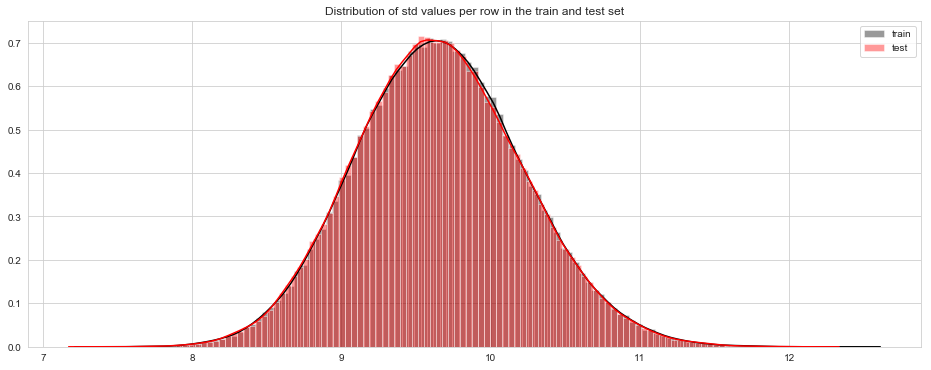

In [26]:
# distribution of standard deviation of values per row for train and test datasets.

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

Distribution of the standard deviation of values per columns in the train and test datasets.

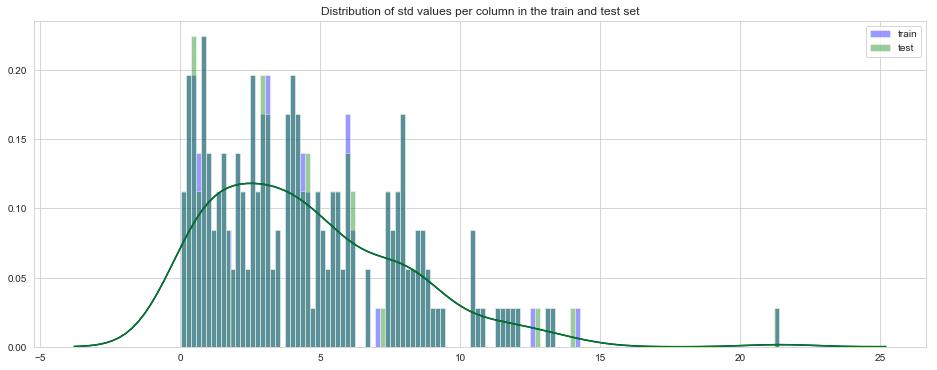

In [27]:
# distribution of the standard deviation of values per columns in the train and test datasets.

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

Distribution of skew per row in the train and test set.

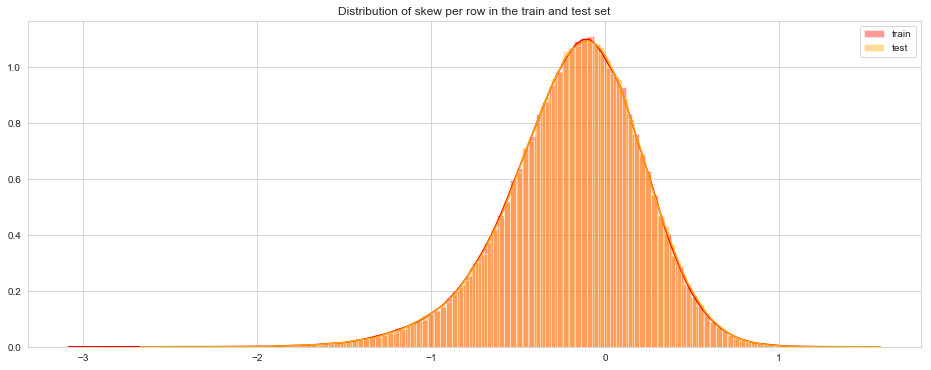

In [28]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Distribution of skew per column in the train and test set

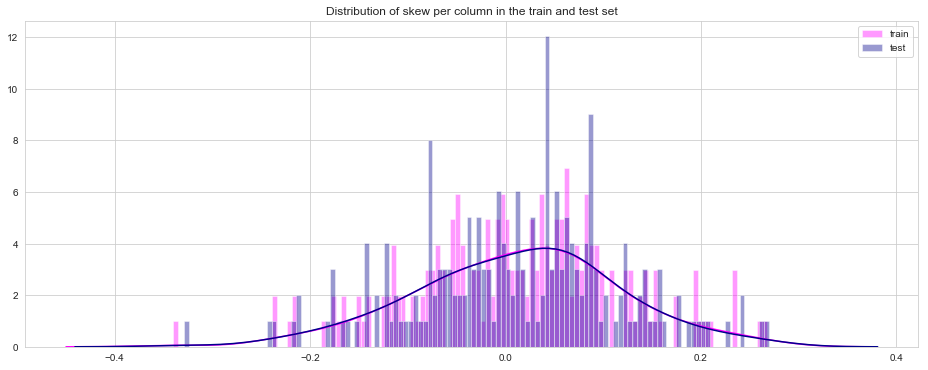

In [29]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()


### Feature Engineering

In [30]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,var_121,var_26,1.688626e-09
1,var_26,var_121,1.688626e-09
2,var_135,var_129,2.486078e-07
3,var_129,var_135,2.486078e-07
4,var_165,var_19,6.854838e-07
5,var_19,var_165,6.854838e-07
6,var_123,var_135,7.795856e-07
7,var_135,var_123,7.795856e-07
8,var_149,var_155,9.244579e-07
9,var_155,var_149,9.244579e-07


In [31]:
correlations.tail(10)

,level_0,level_1,0
39790,var_189,var_183,0.009273
39791,var_183,var_189,0.009273
39792,var_81,var_174,0.009327
39793,var_174,var_81,0.009327
39794,var_148,var_53,0.009638
39795,var_53,var_148,0.009638
39796,var_81,var_165,0.009676
39797,var_165,var_81,0.009676
39798,var_26,var_139,0.009840
39799,var_139,var_26,0.009840


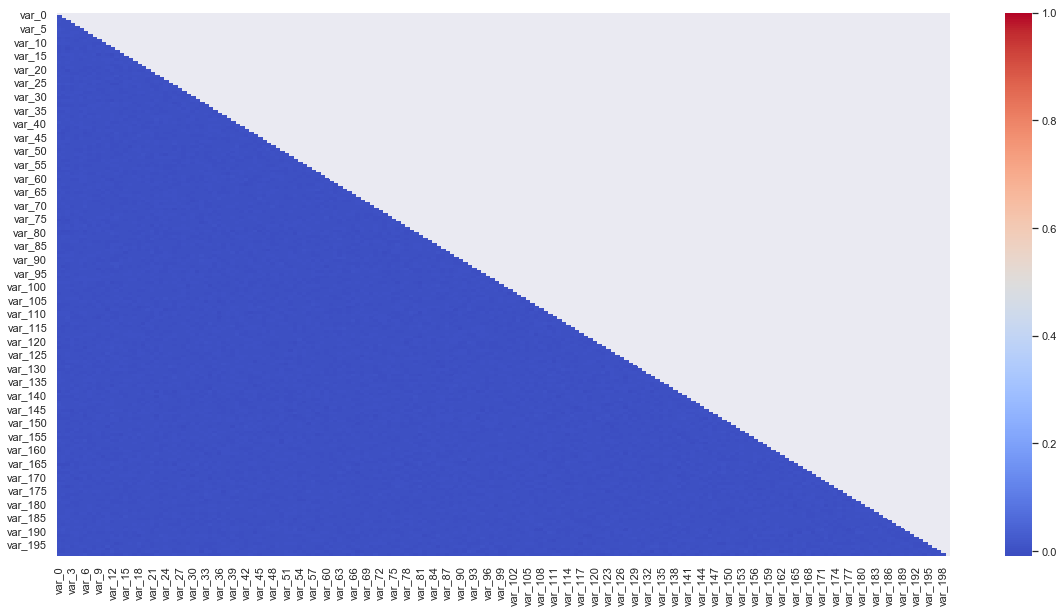

In [35]:
sns.set(rc={'figure.figsize':(20,10)})

# Compute the correlation matrix
correlations = train[features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


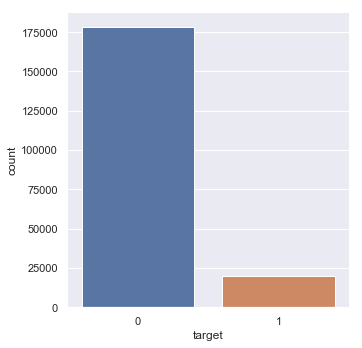

In [36]:
import seaborn as sns
#count of both class(number of classes)
train['target'].value_counts()
sns.factorplot('target', data=train, kind='count')

IN OUR CASE GIVEN DATA IS IMBALANCED……WHERE 90% OF SAMPLES BELONGS TO CLASS 0 AND ONLY 10% BELONGS TO CLASS 1

In [37]:
train.shape

(198264, 202)

#### Data Sampling

WE seperate the dataset whose target class is belong to class 0

In [38]:
#WE seperate the dataset whose target class is belong to class 0
data=train.loc[train['target'] == 0]
#choose starting 30000 rows
data2=data.loc[:30000]
data2

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


WE seperate the dataset whose target class is belong to class 1

In [43]:
#WE seperate the dataset whose target class is belong to class 1
data1=train.loc[train['target'] == 1]
data1

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
72,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
84,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
99,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
119,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
120,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


Add both Dataframe data1 and data2 in one dataframe

In [44]:
#Add both Dataframe data1 and data2 in one dataframe
newdata=pd.concat([data1, data2], ignore_index=True)
newdata

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
1,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
2,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
3,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
4,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
5,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
6,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
7,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
8,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
9,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


Shuffle the Dataframe

In [45]:
#Shuffle the Dataframe
newdata=newdata.sample(frac=1)
newdata

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
7347,train_73703,1,13.6461,-6.5676,11.1512,6.1547,9.1030,7.7664,6.2455,15.3858,...,-0.0584,5.9513,0.5359,4.7343,19.6620,1.8213,6.9594,11.0418,17.2975,14.8675
20830,train_1029,0,13.3933,6.9202,6.6848,8.7206,10.0328,-16.4704,5.2713,16.5230,...,-4.4923,12.8953,3.4436,2.9464,21.2763,-2.2399,10.0283,7.7844,16.1061,-0.6926
16514,train_165806,1,14.0084,1.2411,10.6125,8.6468,9.5261,0.8938,7.4521,15.9311,...,3.8826,3.1363,2.5509,5.3652,20.7334,-0.7318,-6.8986,9.3089,12.7573,-10.4216
20179,train_296,0,13.3937,-8.1923,12.0539,7.5772,9.9983,-14.5471,5.6977,18.0240,...,7.0892,14.0716,0.9415,0.4832,13.6556,0.0234,0.8794,8.3312,13.7777,-4.7896
19646,train_197759,1,16.6207,-3.7467,11.9851,4.9051,10.0794,11.3060,6.0476,12.3071,...,10.5722,5.3552,-1.3265,6.6247,20.6407,-1.2114,0.9733,7.4159,17.7365,13.6067
16810,train_168950,1,10.8380,2.1530,10.8743,5.7314,12.4392,-14.1475,5.0367,12.7850,...,5.4827,8.0390,3.0486,-3.6807,14.9006,2.1200,0.1505,8.4794,14.2037,-2.0357
16978,train_170645,1,18.8058,4.9371,10.5603,5.8452,9.3808,-15.9236,4.3530,11.5850,...,0.1198,1.1357,3.3875,4.7779,17.0057,-0.6698,2.8846,9.0926,16.5068,-4.5419
4946,train_50315,1,13.9156,-0.2608,12.7488,6.8714,10.1331,-9.0491,5.2344,16.2377,...,11.1099,8.1831,4.0334,2.7873,20.0209,-4.0357,-4.2632,7.6311,21.4127,10.2699
30003,train_11297,0,12.3491,2.8674,10.8700,8.3578,10.2194,5.1629,5.2381,12.9040,...,-2.2634,7.3102,1.0790,0.1629,18.2183,-3.1800,3.1468,8.1064,17.6762,8.5745
24889,train_5554,0,10.2969,-9.0853,10.3252,3.3757,12.4795,1.8414,4.8835,12.6201,...,4.3969,6.6474,1.7831,6.8061,21.0900,-0.2404,-6.8165,9.5640,17.8823,-16.5644


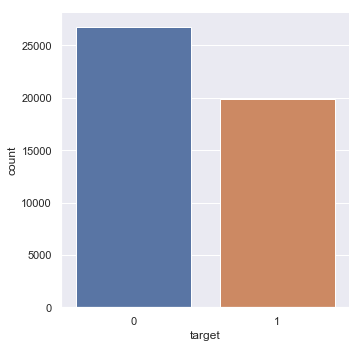

In [46]:
sns.factorplot('target', data=newdata, kind='count')

## Model Development

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)
[image-source](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

After applying undersampling technique,we get the balanced data as shown above

In [47]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [48]:
# Replace target variable categories with Yes or No
newdata['target'] = newdata['target'].replace(0, 'No')
newdata['target'] = newdata['target'].replace(1, 'Yes')

# Converted entries of 'target' variable from o/1 to No/Yes
newdata.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
7347,train_73703,Yes,13.6461,-6.5676,11.1512,6.1547,9.1030,7.7664,6.2455,15.3858,...,-0.0584,5.9513,0.5359,4.7343,19.6620,1.8213,6.9594,11.0418,17.2975,14.8675
20830,train_1029,No,13.3933,6.9202,6.6848,8.7206,10.0328,-16.4704,5.2713,16.5230,...,-4.4923,12.8953,3.4436,2.9464,21.2763,-2.2399,10.0283,7.7844,16.1061,-0.6926
16514,train_165806,Yes,14.0084,1.2411,10.6125,8.6468,9.5261,0.8938,7.4521,15.9311,...,3.8826,3.1363,2.5509,5.3652,20.7334,-0.7318,-6.8986,9.3089,12.7573,-10.4216
20179,train_296,No,13.3937,-8.1923,12.0539,7.5772,9.9983,-14.5471,5.6977,18.0240,...,7.0892,14.0716,0.9415,0.4832,13.6556,0.0234,0.8794,8.3312,13.7777,-4.7896
19646,train_197759,Yes,16.6207,-3.7467,11.9851,4.9051,10.0794,11.3060,6.0476,12.3071,...,10.5722,5.3552,-1.3265,6.6247,20.6407,-1.2114,0.9733,7.4159,17.7365,13.6067


In [49]:
# Divide data into train and test for model Development
X = newdata.values[:, 2:202]
Y = newdata.values[:,1]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

#### Decision tree

In [50]:
# Decision tree

C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#test scores

C50_predictions = C50_model.predict(X_test)
C50_predictions

array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [51]:
#confusion matrix

CM = pd.crosstab(y_test, C50_predictions)

#let check for belw values
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

col_0,No,Yes
row_0,,
No,3422,1959
Yes,1879,2078


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,C50_predictions))

from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, C50_predictions)*100)

              precision    recall  f1-score   support

          No       0.65      0.64      0.64      5381
         Yes       0.51      0.53      0.52      3957

    accuracy                           0.59      9338
   macro avg       0.58      0.58      0.58      9338
weighted avg       0.59      0.59      0.59      9338

Accuracy: 58.899121867637604


#### Random Forest

In [53]:
# Random Forest
# Import Libraries
from sklearn.ensemble import RandomForestClassifier

# Develop and train random forest model
RF_model = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

# Predict new test cases
RF_Predictions = RF_model.predict(X_test)
RF_Predictions

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [54]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, RF_Predictions)

# To get confusion matrix in tabular form
CM = pd.crosstab(y_test, RF_Predictions)

CM

col_0,No,Yes
row_0,,
No,4497,884
Yes,2336,1621


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,RF_Predictions))

              precision    recall  f1-score   support

          No       0.66      0.84      0.74      5381
         Yes       0.65      0.41      0.50      3957

    accuracy                           0.66      9338
   macro avg       0.65      0.62      0.62      9338
weighted avg       0.65      0.66      0.64      9338



In [56]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, RF_Predictions)*100)

Accuracy: 65.51724137931035


#### logistic regression

In [57]:
# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#instantiate the model

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Predict new test cases
log_Pred = logreg.predict(X_test)
log_Pred

array(['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [59]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, log_Pred)

# To get confusion matrix in tabular form
CM = pd.crosstab(y_test, log_Pred)

CM

col_0,No,Yes
row_0,,
No,4480,901
Yes,1160,2797


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_Pred))

              precision    recall  f1-score   support

          No       0.79      0.83      0.81      5381
         Yes       0.76      0.71      0.73      3957

    accuracy                           0.78      9338
   macro avg       0.78      0.77      0.77      9338
weighted avg       0.78      0.78      0.78      9338



In [61]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, log_Pred)*100)

Accuracy: 77.92889269650888


#### Naive Bayes

In [62]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
#implementation
Nave_model = GaussianNB().fit(X_train, y_train)
NB_Predictions= Nave_model.predict(X_test)
NB_Predictions

array(['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype='<U3')

In [63]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, NB_Predictions)
CM = pd.crosstab(y_test, NB_Predictions)
CM

col_0,No,Yes
row_0,,
No,4572,809
Yes,1009,2948


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,NB_Predictions))

              precision    recall  f1-score   support

          No       0.82      0.85      0.83      5381
         Yes       0.78      0.75      0.76      3957

    accuracy                           0.81      9338
   macro avg       0.80      0.80      0.80      9338
weighted avg       0.80      0.81      0.80      9338



In [65]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, NB_Predictions)*100)

Accuracy: 80.5311629899336


# SUMMARY
"To get the most accurate model out of various models the value of recall, precision, AUC should be high".
As per the directions of our project we have to predict the results based on recall, precision and accuracy 
of all machine learning algorithm. Out of all the above developed Machine Learning algorithms we can deduce 
that "Naive Bayes" is giving all the quantities highest among all other algorithms. Hence "Naive Bayes" is 
selected to predict target variable from our given test data.


#### FINDING THE TARGET VALUE OF TEST DATA
* Now since we have tested all the Machine Learning Algorithms and Statistical Models on our Training Data and retrieved the accuracy from each model 
* So we choose Naive Bayes method of Supervised Learning to predict the value of our target variable on our test Data

In [66]:
# Load Data testing data
test = pd.read_csv('test.csv')
test.shape

(200000, 201)

In [67]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [68]:
# Drop the ID_code column from the Dataset as our model is not trained for it
test = test.drop(['ID_code'], axis=1)
test.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [69]:
test['target'] = Nave_model.predict(test)
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,No
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,Yes
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,Yes
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,No
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,No


In [70]:
test.to_csv('santander_test_predict_py.csv',index=False)